<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.299792,49.283639,51.627379,0.165179,187.375989,187.071169,0.304821
1,0.0,1.0,74.752559,64.045590,61.112483,0.739928,210.650560,209.902327,0.748233
2,0.0,2.0,21.754798,75.743294,75.352628,-1.324942,181.525779,182.211596,-0.685817
3,0.0,3.0,42.692673,83.685796,60.358477,0.328306,197.065252,196.300269,0.764983
4,0.0,4.0,53.624878,29.900980,78.050634,0.313820,171.890313,171.279768,0.610544
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.911496,77.808221,51.562790,1.404369,178.686876,177.517525,1.169350
29996,999.0,26.0,46.008210,68.974196,37.030976,-0.383197,161.630184,162.094002,-0.463818
29997,999.0,27.0,90.627975,65.090475,92.064874,-0.760163,257.023161,257.480037,-0.456875
29998,999.0,28.0,77.085890,43.881074,64.827202,-0.341973,195.452194,195.350861,0.101333


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.299792  49.283639  51.627379  0.165179  187.375989   
      1.0    74.752559  64.045590  61.112483  0.739928  210.650560   
      2.0    21.754798  75.743294  75.352628 -1.324942  181.525779   
      3.0    42.692673  83.685796  60.358477  0.328306  197.065252   
      4.0    53.624878  29.900980  78.050634  0.313820  171.890313   
...                ...        ...        ...       ...         ...   
999.0 25.0   37.911496  77.808221  51.562790  1.404369  178.686876   
      26.0   46.008210  68.974196  37.030976 -0.383197  161.630184   
      27.0   90.627975  65.090475  92.064874 -0.760163  257.023161   
      28.0   77.085890  43.881074  64.827202 -0.341973  195.452194   
      29.0   75.211787  67.545435  26.035901 -0.007126  178.785996   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.071169  0.304821  
      1.0    209.902327  0.748233  
      2.0    182.211596 -0.685817  
      3.0    196.300269  0.764983  
      4.0    171.279768  0.610544  
...                 ...       ...  
999.0 25.0   177.517525  1.169350  
      26.0   162.094002 -0.463818  
      27.0   257.480037 -0.456875  
      28.0   195.350861  0.101333  
      29.0   178.654563  0.131433  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.299792  49.283639  51.627379  0.165179  187.375989   
      1.0    74.752559  64.045590  61.112483  0.739928  210.650560   
      2.0    21.754798  75.743294  75.352628 -1.324942  181.525779   
      3.0    42.692673  83.685796  60.358477  0.328306  197.065252   
      4.0    53.624878  29.900980  78.050634  0.313820  171.890313   
...                ...        ...        ...       ...         ...   
999.0 25.0   37.911496  77.808221  51.562790  1.404369  178.686876   
      26.0   46.008210  68.974196  37.030976 -0.383197  161.630184   
      27.0   90.627975  65.090475  92.064874 -0.760163  257.023161   
      28.0   77.085890  43.881074  64.827202 -0.341973  195.452194   
      29.0   75.211787  67.545435  26.035901 -0.007126  178.785996   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.071169  0.304821  
      1.0    209.902327  0.748233  
      2.0    182.211596 -0.685817  
      3.0    196.300269  0.764983  
      4.0    171.279768  0.610544  
...                 ...       ...  
999.0 25.0   177.517525  1.169350  
      26.0   162.094002 -0.463818  
      27.0   257.480037 -0.456875  
      28.0   195.350861  0.101333  
      29.0   178.654563  0.131433  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.299792,49.283639,51.627379,0.165179,187.375989,187.071169,0.304821
1,0.0,1.0,74.752559,64.045590,61.112483,0.739928,210.650560,209.902327,0.748233
2,0.0,2.0,21.754798,75.743294,75.352628,-1.324942,181.525779,182.211596,-0.685817
3,0.0,3.0,42.692673,83.685796,60.358477,0.328306,197.065252,196.300269,0.764983
4,0.0,4.0,53.624878,29.900980,78.050634,0.313820,171.890313,171.279768,0.610544
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,37.911496,77.808221,51.562790,1.404369,178.686876,177.517525,1.169350
29996,999.0,26.0,46.008210,68.974196,37.030976,-0.383197,161.630184,162.094002,-0.463818
29997,999.0,27.0,90.627975,65.090475,92.064874,-0.760163,257.023161,257.480037,-0.456875
29998,999.0,28.0,77.085890,43.881074,64.827202,-0.341973,195.452194,195.350861,0.101333


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.299792  49.283639  51.627379  0.165179  187.375989   
      1.0    74.752559  64.045590  61.112483  0.739928  210.650560   
      2.0    21.754798  75.743294  75.352628 -1.324942  181.525779   
      3.0    42.692673  83.685796  60.358477  0.328306  197.065252   
      4.0    53.624878  29.900980  78.050634  0.313820  171.890313   
...                ...        ...        ...       ...         ...   
999.0 25.0   37.911496  77.808221  51.562790  1.404369  178.686876   
      26.0   46.008210  68.974196  37.030976 -0.383197  161.630184   
      27.0   90.627975  65.090475  92.064874 -0.760163  257.023161   
      28.0   77.085890  43.881074  64.827202 -0.341973  195.452194   
      29.0   75.211787  67.545435  26.035901 -0.007126  178.785996   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.071169  0.304821  
      1.0    209.902327  0.748233  
      2.0    182.211596 -0.685817  
      3.0    196.300269  0.764983  
      4.0    171.279768  0.610544  
...                 ...       ...  
999.0 25.0   177.517525  1.169350  
      26.0   162.094002 -0.463818  
      27.0   257.480037 -0.456875  
      28.0   195.350861  0.101333  
      29.0   178.654563  0.131433  

[30000 rows x 7 columns]

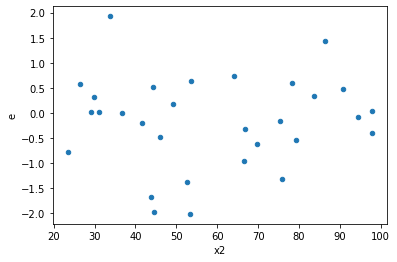

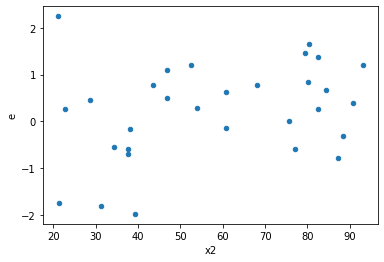

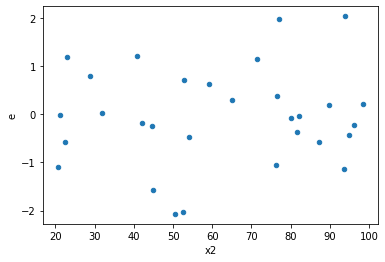

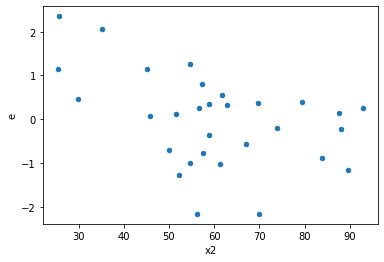

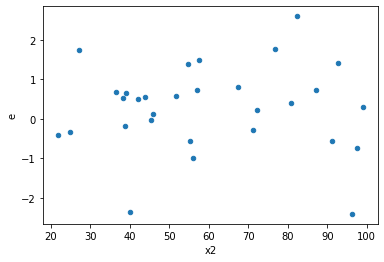

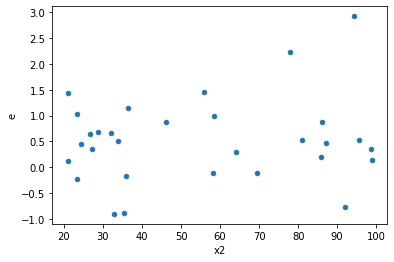

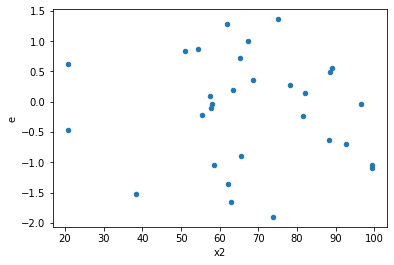

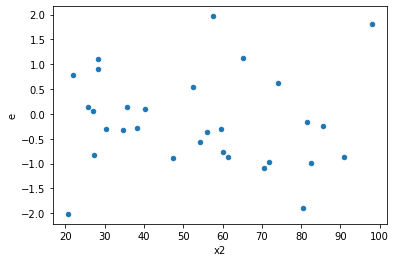

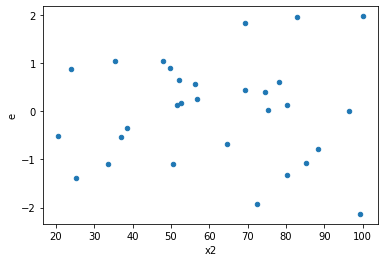

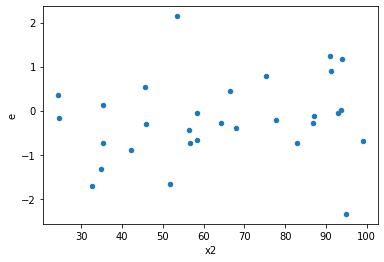

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,9.0,15.0,6.778094134309955,11.015855803508197,0.753121570478884,0.7343903869005465,0.9751286056427424,0.992850005120379,0.5035749974398105,0.4964250025601895,Reject001=1 : Homoscedasticity
1.0,12.0,12.0,4.279925140556539,14.50958008596402,0.3566604283797116,1.209131673830335,3.390148100599084,0.044123212136233825,0.9779383939318831,0.022061606068116912,Reject001=1 : Homoscedasticity
2.0,9.0,15.0,6.975961522161001,16.051946347548434,0.7751068357956669,1.0701297565032288,1.3806222666127224,0.5580343829584673,0.7209828085207663,0.27901719147923365,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,9.731179007861721,8.342093234054113,0.7485522313739785,0.7583721121867376,1.0131184978164243,0.9954095178274427,0.5022952410862787,0.49770475891372135,Reject001=1 : Homoscedasticity
7.0,11.0,13.0,6.1790977167532315,15.622233330105082,0.5617361560684756,1.2017102561619295,2.139278811199472,0.19354180653622377,0.9032290967318881,0.09677090326811189,Reject001=1 : Homoscedasticity
9.0,12.0,12.0,6.443639148105311,10.569591023112645,0.5369699290087759,0.8807992519260538,1.6403139251242103,0.4035018549797831,0.7982490725101085,0.20175092748989154,Reject001=1 : Homoscedasticity
11.0,12.0,12.0,12.428059072607514,25.6934528369168,1.0356715893839594,2.141121069743067,2.0673745342542933,0.22277658856847937,0.8886117057157603,0.11138829428423969,Reject001=1 : Homoscedasticity
12.0,8.0,16.0,5.5429621348459674,20.30624425975616,0.6928702668557459,1.26914026623476,1.8317141418033922,0.2882490667848383,0.8558754666075808,0.14412453339241915,Reject001=1 : Homoscedasticity
14.0,19.0,5.0,14.815082388492117,12.114469573138418,0.7797411783416903,2.4228939146276836,3.1073053237749453,0.21275367494229536,0.8936231625288523,0.10637683747114768,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,15.0,6.778094134309955,11.015855803508197,0.753121570478884,0.7343903869005465,0.9751286056427424,0.992850005120379,Reject001=1 : Homoscedasticity
1.0,12.0,12.0,4.279925140556539,14.50958008596402,0.3566604283797116,1.209131673830335,3.390148100599084,0.044123212136233825,Reject001=1 : Homoscedasticity
2.0,9.0,15.0,6.975961522161001,16.051946347548434,0.7751068357956669,1.0701297565032288,1.3806222666127224,0.5580343829584673,Reject001=1 : Homoscedasticity
3.0,5.0,19.0,6.769511491564835,17.907868573668882,1.353902298312967,0.9425193986141517,0.6961502316589463,0.7343592578520433,Reject001=1 : Homoscedasticity
4.0,11.0,13.0,16.46977087699068,11.8843790165851,1.4972518979082436,0.914183001275777,0.6105739472115206,0.419025025387152,Reject001=1 : Homoscedasticity
5.0,13.0,11.0,9.731179007861721,8.342093234054113,0.7485522313739785,0.7583721121867376,1.0131184978164243,0.9954095178274427,Reject001=1 : Homoscedasticity
6.0,16.0,8.0,13.696002226402713,6.974673786984834,0.8560001391501696,0.8718342233731042,1.0184977589357107,0.9684188089207999,Reject001=1 : Homoscedasticity
7.0,11.0,13.0,6.1790977167532315,15.622233330105082,0.5617361560684756,1.2017102561619295,2.139278811199472,0.19354180653622377,Reject001=1 : Homoscedasticity
8.0,10.0,14.0,13.75740550938912,7.42777567780969,1.375740550938912,0.530555405557835,0.38565077201202136,0.13491443356242122,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      968
Reject001=0 : Heteroscedasticity     32
Name: Result_test, dtype: int64